<a href="https://colab.research.google.com/github/Shristy0412/-COVID-19-trend-analysis-and-forecasting/blob/main/SQL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path="/content/covid_data_mock.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
conn = sqlite3.connect("covid_data.db")

In [5]:
df.to_sql("covid_data", conn, if_exists="replace", index=False)
print("Data loaded successfully!")
conn.close()

Data loaded successfully!


In [6]:
conn = sqlite3.connect("covid_data.db")

In [7]:
query = """
SELECT region, SUM(new_cases) AS total_cases
FROM covid_data
GROUP BY region
ORDER BY total_cases DESC;
"""
total_cases = pd.read_sql_query(query, conn)
print(total_cases)

conn.close()

          region  total_cases
0           Asia       944991
1         Europe       937169
2  North America       930991
3      Australia       911593
4  South America       890585
5         Africa       870419


In [8]:
queries = {
    "Total Cases by Region": """
        SELECT region, SUM(new_cases) AS total_cases
        FROM covid_data
        GROUP BY region
        ORDER BY total_cases DESC;
    """,
    "Regions with Highest Recovery Rates": """
        SELECT region,
               SUM(new_recoveries) * 1.0 / SUM(new_cases) AS recovery_rate
        FROM covid_data
        GROUP BY region
        ORDER BY recovery_rate DESC;
    """,
    "Daily Trends for North America": """
        SELECT date, SUM(new_cases) AS daily_cases
        FROM covid_data
        WHERE region = 'North America'
        GROUP BY date
        ORDER BY date;
    """
}

# Execute and print results
conn = sqlite3.connect("covid_data.db")

for title, query in queries.items():
    print(f"\n{title}")
    result = pd.read_sql_query(query, conn)
    print(result)

conn.close()



Total Cases by Region
          region  total_cases
0           Asia       944991
1         Europe       937169
2  North America       930991
3      Australia       911593
4  South America       890585
5         Africa       870419

Regions with Highest Recovery Rates
          region  recovery_rate
0         Africa       0.534757
1      Australia       0.531455
2           Asia       0.520116
3         Europe       0.517490
4  North America       0.514586
5  South America       0.500408

Daily Trends for North America
           date  daily_cases
0    2020-01-01         4933
1    2020-01-02         4224
2    2020-01-03         4240
3    2020-01-04         3701
4    2020-01-05          114
..          ...          ...
361  2020-12-27          974
362  2020-12-28         2345
363  2020-12-29           33
364  2020-12-30           11
365  2020-12-31         1566

[366 rows x 2 columns]


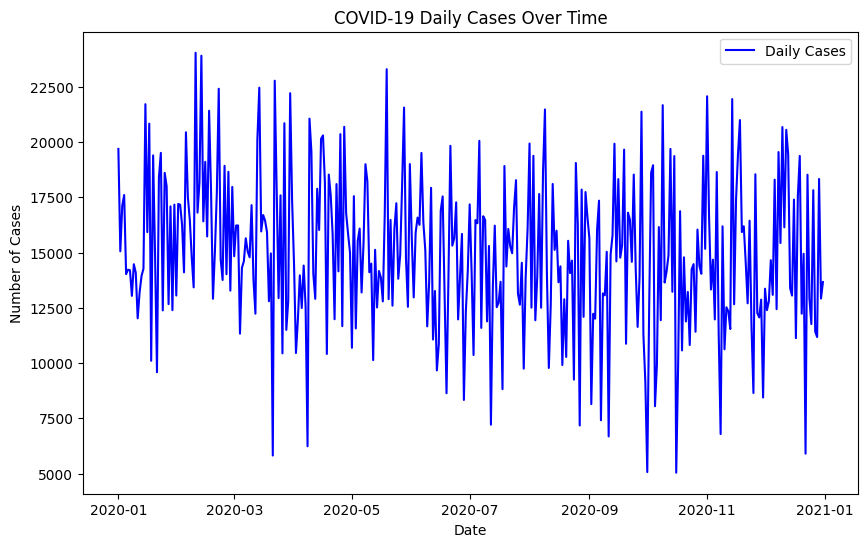

In [11]:
conn = sqlite3.connect("covid_data.db")

# Query data
query = """
SELECT date, SUM(new_cases) AS daily_cases
FROM covid_data
GROUP BY date
ORDER BY date;
"""
daily_trends = pd.read_sql_query(query, conn)
conn.close()

# Plot daily trends
daily_trends["date"] = pd.to_datetime(daily_trends["date"])
plt.figure(figsize=(10, 6))
plt.plot(daily_trends["date"], daily_trends["daily_cases"], label="Daily Cases", color="blue")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Daily Cases Over Time")
plt.legend()
plt.show()


In [13]:
conn = sqlite3.connect("covid_data.db")
query = """
SELECT region, date, MAX(new_cases) AS peak_cases
FROM covid_data
GROUP BY region
ORDER BY peak_cases DESC;
"""
peak_days = pd.read_sql_query(query, conn)
conn.close()

print(peak_days)

          region        date  peak_cases
0         Africa  2020-04-27        5000
1  South America  2020-04-13        4993
2           Asia  2020-10-05        4990
3  North America  2020-07-02        4986
4      Australia  2020-12-13        4985
5         Europe  2020-03-05        4984


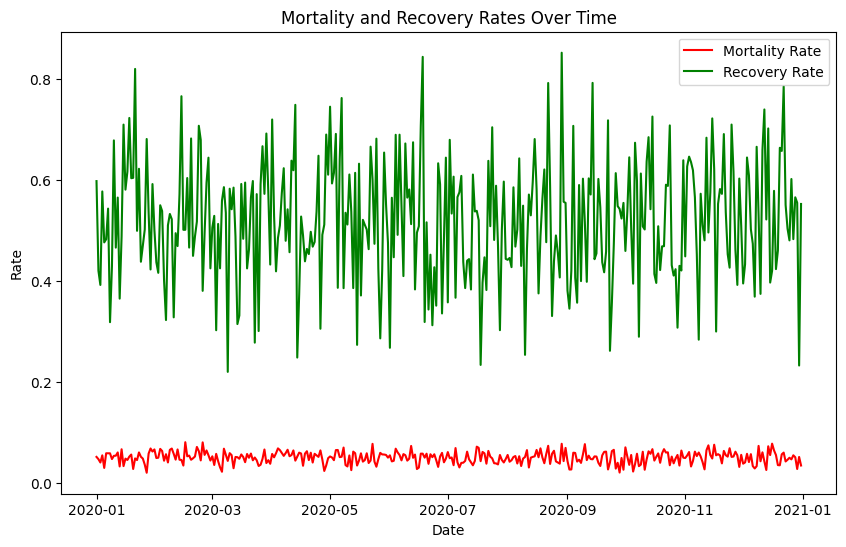

In [14]:
conn = sqlite3.connect("covid_data.db")

query = """
SELECT date,
       SUM(new_deaths) * 1.0 / SUM(new_cases) AS mortality_rate,
       SUM(new_recoveries) * 1.0 / SUM(new_cases) AS recovery_rate
FROM covid_data
GROUP BY date
ORDER BY date;
"""
rates_over_time = pd.read_sql_query(query, conn)
conn.close()

# Plot the trends
rates_over_time["date"] = pd.to_datetime(rates_over_time["date"])
plt.figure(figsize=(10, 6))
plt.plot(rates_over_time["date"], rates_over_time["mortality_rate"], label="Mortality Rate", color="red")
plt.plot(rates_over_time["date"], rates_over_time["recovery_rate"], label="Recovery Rate", color="green")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.title("Mortality and Recovery Rates Over Time")
plt.legend()
plt.show()

In [15]:
region = input("Enter the region for insights (e.g., Asia): ")

conn = sqlite3.connect("covid_data.db")
query = f"""
SELECT date, SUM(new_cases) AS total_cases, SUM(new_deaths) AS total_deaths, SUM(new_recoveries) AS total_recoveries
FROM covid_data
WHERE region = '{region}'
GROUP BY date
ORDER BY date;
"""
region_data = pd.read_sql_query(query, conn)
conn.close()

# Display summary
print(f"Insights for {region}:")
print(region_data.head())

Enter the region for insights (e.g., Asia): Asia
Insights for Asia:
         date  total_cases  total_deaths  total_recoveries
0  2020-01-01         3314           241              1140
1  2020-01-02         2299           169               232
2  2020-01-03         3424            80              1114
3  2020-01-04         4496           180              3634
4  2020-01-05          835            21               759


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecasted cases for the next 30 days:
2021-01-01    2407.000485
2021-01-02    2659.563172
2021-01-03    2897.044678
2021-01-04    2865.572383
2021-01-05    2717.476679
2021-01-06    2683.503330
2021-01-07    2710.268915
2021-01-08    2760.796105
2021-01-09    2769.111405
2021-01-10    2747.466646
2021-01-11    2732.220666
2021-01-12    2734.730150
2021-01-13    2743.460081
2021-01-14    2747.770303
2021-01-15    2745.129371
2021-01-16    2741.625844
2021-01-17    2741.026045
2021-01-18    2742.479461
2021-01-19    2743.615874
2021-01-20    2743.501559
2021-01-21    2742.831179
2021-01-22    2742.531179
2021-01-23    2742.705557
2021-01-24    2742.959577
2021-01-25    2743.011166
2021-01-26    2742.907422
2021-01-27    2742.822925
2021-01-28    2742.830081
2021-01-29    2742.877560
2021-01-30    2742.900471
Freq: D, Name: predicted_mean, dtype: float64


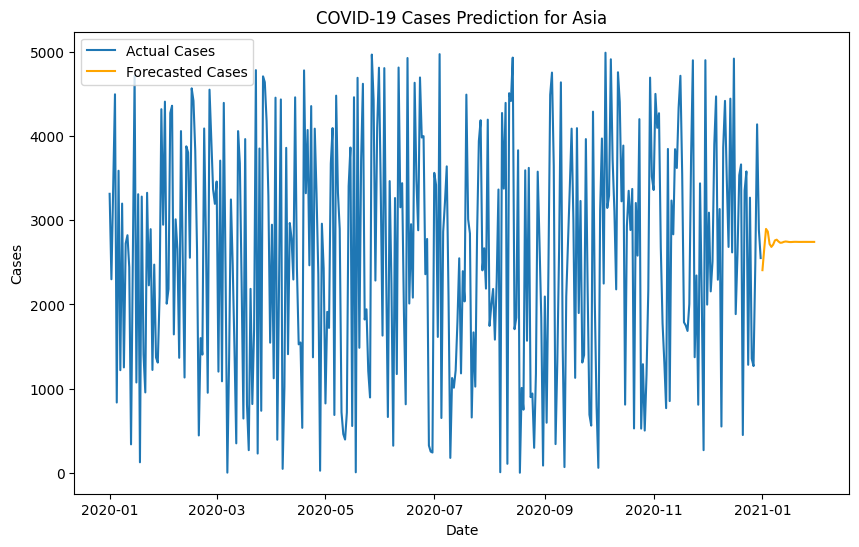

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data for forecasting
region_data["date"] = pd.to_datetime(region_data["date"])
region_data.set_index("date", inplace=True)
cases = region_data["total_cases"]

# Fit ARIMA model
model = ARIMA(cases, order=(5, 1, 0))
model_fit = model.fit()

# Predict next 30 days
forecast = model_fit.forecast(steps=30)
print("Forecasted cases for the next 30 days:")
print(forecast)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(cases, label="Actual Cases")
plt.plot(cases.index[-1] + pd.to_timedelta(range(1, 31), "D"), forecast, label="Forecasted Cases", color="orange")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title(f"COVID-19 Cases Prediction for {region}")
plt.legend()
plt.show()

In [17]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [18]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Start Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("COVID-19 Data Insights"),
    dcc.Dropdown(
        id="region-dropdown",
        options=[{"label": r, "value": r} for r in df["region"].unique()],
        value="Asia",
        placeholder="Select a region"
    ),
    dcc.Graph(id="cases-trend")
])

@app.callback(
    Output("cases-trend", "figure"),
    [Input("region-dropdown", "value")]
)
def update_graph(region):
    filtered_data = df[df["region"] == region]
    figure = {
        "data": [
            {"x": filtered_data["date"], "y": filtered_data["new_cases"], "type": "line", "name": "Cases"}
        ],
        "layout": {"title": f"COVID-19 Cases Trend in {region}"}
    }
    return figure

# Run app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [23]:
pip install fpdf2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 7.1 MB/s eta 0:00:00


In [24]:
from fpdf import FPDF

# Prepare data for the report
summary = df.groupby("region").agg(
    total_cases=("new_cases", "sum"),
    total_deaths=("new_deaths", "sum"),
    total_recoveries=("new_recoveries", "sum")
)

# Create PDF report
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="COVID-19 Daily Report", ln=True, align="C")

for region, row in summary.iterrows():
    pdf.cell(200, 10, txt=f"{region}: Cases={row['total_cases']}, Deaths={row['total_deaths']}, Recoveries={row['total_recoveries']}", ln=True)

pdf.output("covid_daily_report.pdf")


<ipython-input-24-bbb1048a614a>:13: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

<ipython-input-24-bbb1048a614a>:14: DeprecationWarning:

The parameter "txt" has been renamed to "text" in 2.7.6

<ipython-input-24-bbb1048a614a>:14: DeprecationWarning:

The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.

<ipython-input-24-bbb1048a614a>:17: DeprecationWarning:

The parameter "txt" has been renamed to "text" in 2.7.6

<ipython-input-24-bbb1048a614a>:17: DeprecationWarning:

The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.

